## EXPLORATORY DATA ANALYSIS ON THE AUTOMOBILES DATASET
## **REPORT**

## Introduction 

The dataset under analysis is a collection of automobile specifications containing 205 entries and 25 attributes.
The attributes cover: 
- General information: manufacturer (make), body style, fuel type, aspiration, drive wheels, number of doors.
- Performance and Efficiency: horsepower, engine size, compression ratio, fuel system, city and highway MPG
- Dimension and weight
- Market Data and Price

Exploratory analysis was conducted using descriptive statistics, correlations, and visualisations (scatter plots, heatmaps, and bar plots)to answer questions, such as:

1. Which vehicles are the most expensive and cheapest?
2. How does fuel efficiency (MPG)relate to vehicle price?
3. Which manufacturers produce the most models in the dataset?
4. Which vehicles have the largest engine capacity?
5. How does price correlate with horsepower, engine size and design? 

These insights help to understand the relationships between price, performance, and fuel economy, and highlight which manufacturers dominate in terms of models, efficiency, and engine size.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the automobiles dataset
automobiles_df = pd.read_csv('automobile.txt')
automobiles_df.head(7)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


In [4]:
automobiles_df.shape

(205, 26)

In [14]:
automobiles_df.dtypes


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## Data Cleaning

We have identified columns that are redundant or unnecessary. 

The following columns ['normalized-losses', 'symboling'] will be removed from the data set as they will not be used in the analysis.

In [5]:
automobiles_df = automobiles_df.drop(['normalized-losses', 'symboling'], axis=1, errors='ignore')
automobiles_df.shape

(205, 24)

Two columns have been dropped: from 26 to 24 

### Remove any duplicate rows

In [6]:
# Checking if duplicate rows exist
print ('Number of duplicate rows:', automobiles_df.duplicated().sum())

Number of duplicate rows: 0



### Remove rows with missing data


In [7]:
# Check missing values in the dataset
automobiles_df.isnull().sum()

make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

No missing data in the dataset. However, we need to check if there are any other symbols instead of values in our dataset. Lets look at 20 unique values by column.

In [8]:
{col: automobiles_df[col].unique()[:20] for col in automobiles_df.columns}

{'make': array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
        'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
        'saab', 'subaru', 'toyota'], dtype=object),
 'fuel-type': array(['gas', 'diesel'], dtype=object),
 'aspiration': array(['std', 'turbo'], dtype=object),
 'num-of-doors': array(['two', 'four', '?'], dtype=object),
 'body-style': array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
       dtype=object),
 'drive-wheels': array(['rwd', 'fwd', '4wd'], dtype=object),
 'engine-location': array(['front', 'rear'], dtype=object),
 'wheel-base': array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
         88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
        102. ,  93.1]),
 'length': array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
        197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
        

### Changing Data Types

There are question mark (?) placeholders across the dataset, that keep numeric data as objects in the following columns: 
'bore', 'stroke', 'horsepower', 'peak-rpm', 'price'. 

We will first replace placeholders with NaN, then convert object type to float type, and fill missing values with median (median is less sensitive to possible outliers in the dataset)

In [11]:
# Columns to convert
cols_to_convert = automobiles_df[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']]

# First replace '?' with NaN and convert to float
for col in cols_to_convert:
    automobiles_df[col] = automobiles_df[col].replace('?', np.nan).astype(float)
    
# Fill in missing values with median   
automobiles_df[col].fillna(automobiles_df[col].median())

# Round all float values to 2 decimals
automobiles_df[col] = automobiles_df[col].round(2)


In [14]:
automobiles_df.head()


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [16]:
automobiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    object 
 1   fuel-type          205 non-null    object 
 2   aspiration         205 non-null    object 
 3   num-of-doors       205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   wheel-base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb-weight        205 non-null    int64  
 12  engine-type        205 non-null    object 
 13  num-of-cylinders   205 non-null    object 
 14  engine-size        205 non-null    int64  
 15  fuel-system        205 non-null    object 
 16  bore               201 non

## Finding Certain Categories
Locating all automobiles in the "hatchback" genre.

In [18]:
# We check all values in column body-style, then select hatchback only 

print(automobiles_df['body-style'].value_counts())

hatchback = automobiles_df[automobiles_df['body-style']=='hatchback']

print(hatchback.head(3))

body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
           make fuel-type aspiration num-of-doors body-style drive-wheels  \
2   alfa-romero       gas        std          two  hatchback          rwd   
9          audi       gas      turbo          two  hatchback          4wd   
18    chevrolet       gas        std          two  hatchback          fwd   

   engine-location  wheel-base  length  width  ...  engine-size  fuel-system  \
2            front        94.5   171.2   65.5  ...          152         mpfi   
9            front        99.5   178.2   67.9  ...          131         mpfi   
18           front        88.4   141.1   60.3  ...           61         2bbl   

    bore stroke  compression-ratio horsepower  peak-rpm  city-mpg  \
2   2.68   3.47                9.0      154.0    5000.0        19   
9   3.13   3.40                7.0      160.0    5500.0        16   
18  2.91   3.03                9.5  

## Data Stories and visualisations

### Identify relationships between variables (features)

The main goal here is to identify and create relationships to help formulate ideas.

#### 1. Correlation between expensive and cheap cars based on MPG (miles per gallon).
Firstly, we will look at relationship for all cars. 
Then, we will identify 5 most expensive and 5 cheapest cars to highlight with special markers.

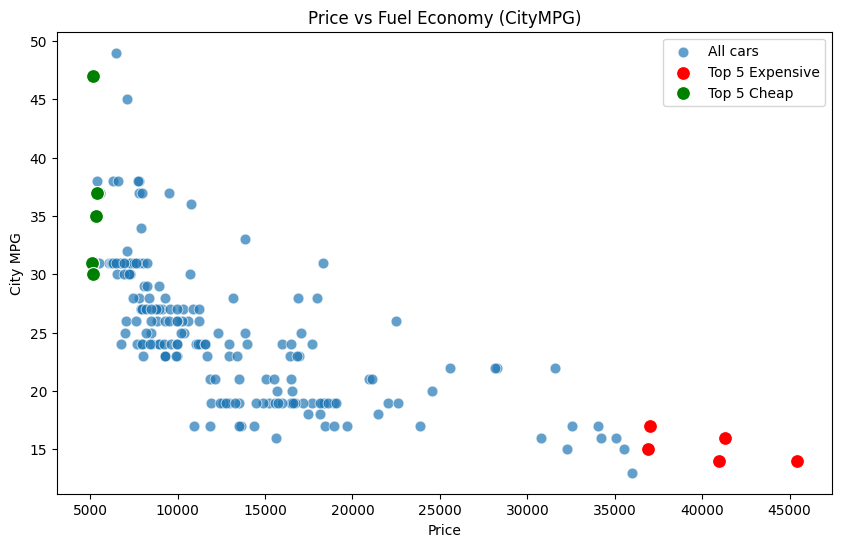

In [19]:
# Scatterplot for all cars
plt.figure(figsize=(10,6))
sns.scatterplot(data=automobiles_df, x='price', y='city-mpg', alpha=0.7, s=60, label='All cars')

# Highlight top 5 expensive 
top5_exp = automobiles_df.nlargest(5, 'price')
sns.scatterplot(data=top5_exp, x='price', y='city-mpg', color='red', s=100, label='Top 5 Expensive')

# Highlight top 5 cheap
top5_cheap = automobiles_df.nsmallest(5, 'price')
sns.scatterplot(data=top5_cheap, x='price', y='city-mpg', color='green', s=100, label= 'Top 5 Cheap')

plt.title('Price vs Fuel Economy (CityMPG)')
plt.xlabel('Price')
plt.ylabel('City MPG')
plt.legend()
plt.show()



- The scatter plot above shows strong negative correlation between car price and mileage per gallon.
- As the price increases, the car economy decreases.
- The majority of cars in our dataset are lower-priced cars of about USD7000-12000, with 23-30 miles per gallon.
- The most expensive cars demonstrate the lowest mileage per gallon: 15 and below, while the cheapest cars' worth USD5000, demonstrate the MPG range of 30-47 miles per gallon.

In [20]:
print(automobiles_df[['price', 'city-mpg', 'highway-mpg']].corr()) 

                price  city-mpg  highway-mpg
price        1.000000 -0.686571    -0.704692
city-mpg    -0.686571  1.000000     0.971337
highway-mpg -0.704692  0.971337     1.000000


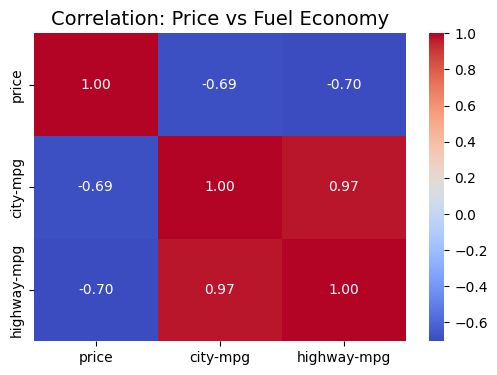

In [21]:
corr = automobiles_df[['price', 'city-mpg', 'highway-mpg']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

plt.title('Correlation: Price vs Fuel Economy', fontsize=14)
plt.show()

- The above scatter plot conclusions are supported by this heatmap that includes both city MPG and Highway MPG.
- City MPG and highway MPG are strongly correlated, which means that cars with low city MPG have low highway MPG and vice versa.
- Price and MPG have strong negative correlation, which means that MPG increases with prices' decrease. 

### 2. Which manufacturer builds the most fuel efficient vehicles?
Compare the average MPG for each vehicle manufacture's vehicles and create a bar plot


In [22]:
# We check all values in column 'make'first
print(automobiles_df['make'].value_counts())


make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: count, dtype: int64


In [23]:
automobiles_df['avg-mpg'] = (automobiles_df['city-mpg'] + automobiles_df['highway-mpg'])/2

mpg_avg = automobiles_df.groupby('make')['avg-mpg'].mean().round(1).sort_values(ascending=False)

print(mpg_avg.head())


make
chevrolet     43.7
isuzu         33.5
honda         32.9
volkswagen    31.8
dodge         31.1
Name: avg-mpg, dtype: float64


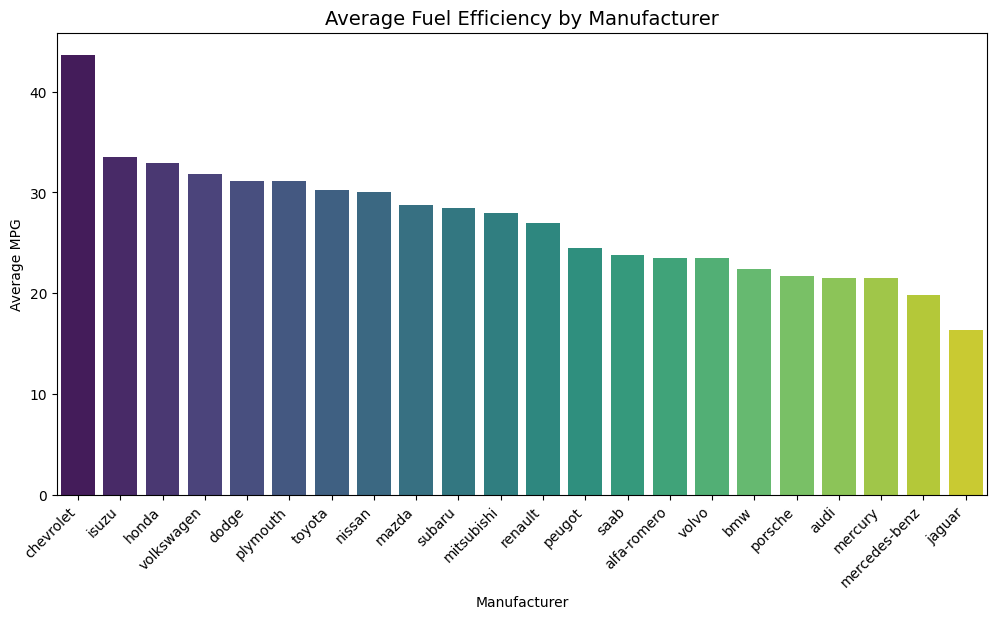

In [24]:
# We create a bar plot to visualise manufacturers and their average MPG 
plt.figure(figsize=(12,6))
sns.barplot(x=mpg_avg.index,
            y=mpg_avg.values,
            hue=mpg_avg.index,
            dodge=False,
            palette='viridis',
            legend=False)

plt.xticks(rotation=45, ha='right')
plt.title('Average Fuel Efficiency by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer')
plt.ylabel('Average MPG')
plt.show()
           

- Chevrolet produces the most efficient vehicles with the highest MPG of 43 miles per gallon.
- Jaguar brand produces the least efficient vehicles with the lowest MPG of 15 miles per gallon.

### 3. Which vehicles have the largest engine capacity.


In [25]:
# Sort the dataframe based on the engine-size column.
largest_engines = automobiles_df.sort_values(by='engine-size', ascending=False)
print(largest_engines[['make', 'body-style', 'engine-size', 'price']].head(10))

             make   body-style  engine-size    price
49         jaguar        sedan          326  36000.0
73  mercedes-benz        sedan          308  40960.0
74  mercedes-benz      hardtop          304  45400.0
48         jaguar        sedan          258  35550.0
47         jaguar        sedan          258  32250.0
71  mercedes-benz        sedan          234  34184.0
72  mercedes-benz  convertible          234  35056.0
16            bmw        sedan          209  41315.0
17            bmw        sedan          209  36880.0
15            bmw        sedan          209  30760.0


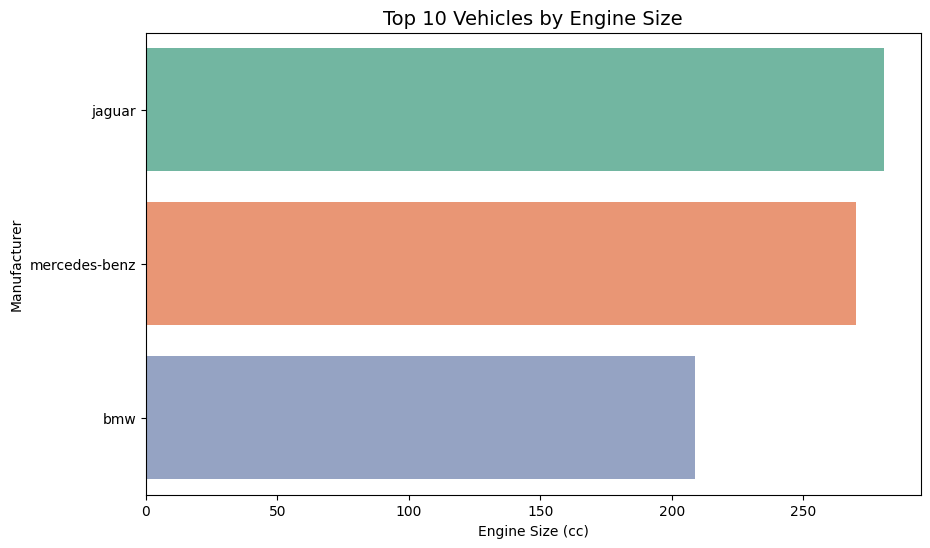

In [26]:
# Bar plt to visualise largest engines by vehicles 
largest_engines = automobiles_df.sort_values(by='engine-size', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='engine-size',
            y='make',
            data=largest_engines,
            hue='make',
            dodge=False,
            palette='Set2',
            errorbar=None,
            legend=False)

plt.title('Top 10 Vehicles by Engine Size', fontsize=14)
plt.xlabel('Engine Size (cc)')
plt.ylabel('Manufacturer')
plt.show()

- The top 10 vehicles with the largest engine capacity are made by Jaguar, followed by Mercedes-Benz and BMW

## 4. Which vehicle manufacturer has the most car models in the dataset.

In [27]:
make_counts = automobiles_df['make'].value_counts()
print(make_counts)

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: count, dtype: int64


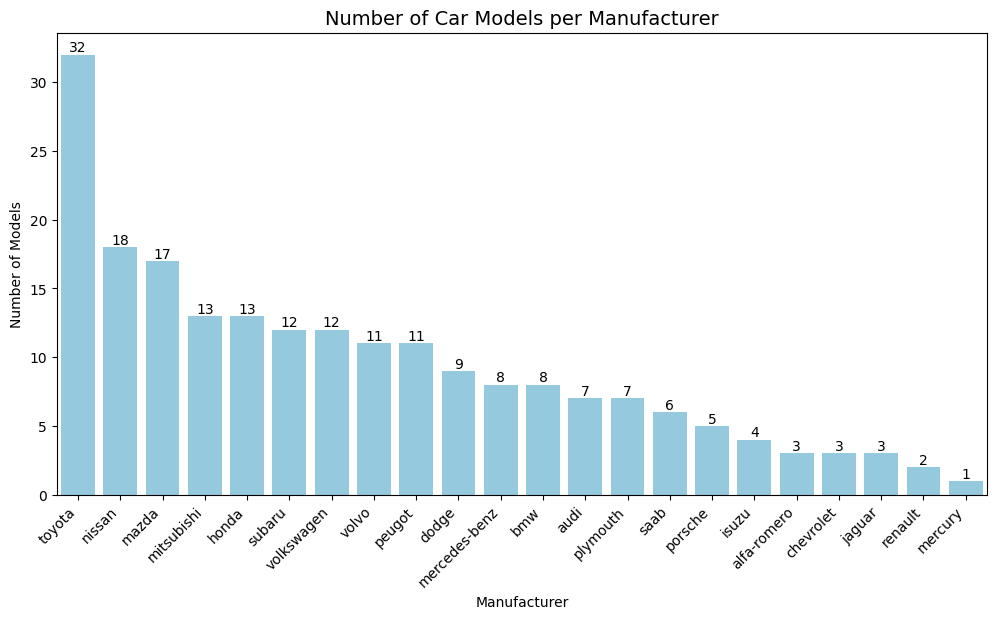

In [28]:
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x=make_counts.index,
    y=make_counts.values,
    color='skyblue'
)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width()/2., 
         p.get_height()),
        ha='center', va='center',
        xytext=(0,5),
        textcoords='offset points'
    )
plt.xticks(rotation=45, ha='right')
plt.title('Number of Car Models per Manufacturer', fontsize=14)
plt.xlabel('Manufacturer')
plt.ylabel('Number of Models')
plt.show()

- Toyota represents the biggest set of car models in the dataset.

## 5. Correlation between numeric values in our dataset to spot relationships 

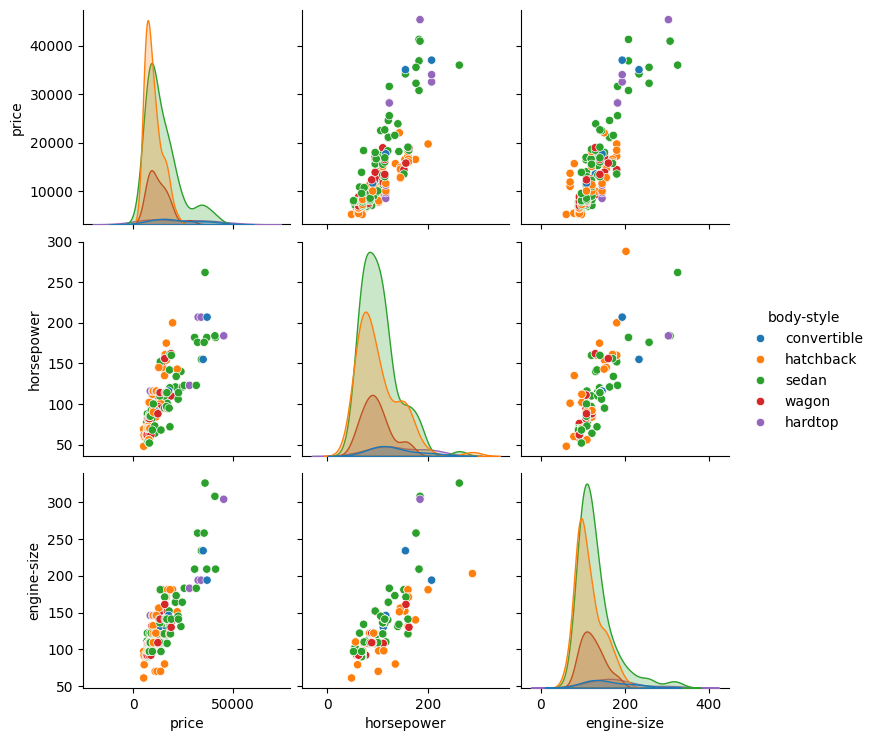

In [36]:
# We pairplot price, horsepower, engine size and color by body style.

sns.pairplot(automobiles_df[['price', 'horsepower', 'engine-size', 'body-style']], hue='body-style') 
plt.show()

The pair plot reveals strong positive correlations between price, vehicle horsepower and engine-size. 
In other words, vehicles with larger engines and higher horsepower tend to have higher prices.
This trend holds consistently across different body styles, indicating that the relationship between engine specifications and price is robust regardless of vehicle design.

## Conclusions 

From the analysis of the automobile dataset, there are several key insights:

- **Fuel economy vs price:** There is a strong negative correlation between vehicle price and fuel economy (city and highway MPG). Expensive cars generally consume more fuel, while cheaper models tend to be more efficient.
- **Top manufacturers:** Toyota has the biggest number of car models represented in the dataset, followed by Nissan and Mazda.
- **Fuel-efficient brands:** Chevrolet, followed by Isuzu and Honda, are the most fuel-efficient, while premium brands, like Jaguar and Mercedes sacrifices MPG for performance and luxury.
- **Engine capacity:** The largest engines in the dataset belong to Jaguar and Mercedes-Benz models, reflecting their focus on high-performance and luxury vehicles.
- **Price extremes:** The most expensive cars (Jaguar, Mercedes-Benz, BMW) tend to have large engines and lower fuel efficiency, while cheaper cars (e.g. Chevrolet, Honda) are small, affordable, and fuel-efficient.
- **Correlation between price, horsepower and engine size:** There is a strong positive correlation - across all body styles, vehicles with larger engines and higher horsepower are higher priced.
   
Overall, manufacturers known for luxury and high performance (Jaguar, Mercedes, BMW) dominate in price and engine size, whereas brands focused on affordability and practicality (Honda, Toyota) excel in fuel efficiency and model variety. This trend holds consistently across different body styles.

#### This report was written by: Olena Manziuk